In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils import convertToMeters, seapodymFieldConstructor, fieldToDataArray
from ikamoana.ikafish.ikafish import IkaFish
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np


In [2]:
configuration_filepath = "./../data/ikamoana_config/Field_Test_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),


In [4]:
# my_sim.oceanToNetCDF("./../data/ikamoana_data/", to_dataset=True)

In [5]:
age_to_plot = 0

In [6]:
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,15))
# S_Ky= xr.load_dataarray('./../data/Inna/FreeGlorys-025x30/skj_cohort_diffusion_y_20080115-20100715.nc')
# S_Ky.isel(mean_age=age_to_plot).plot(ax=ax1)
# fieldToDataArray(my_sim.ocean.Ky).isel(time=age_to_plot).plot(ax=ax2)
# #Looks spatially good at first time step, less similar as time/age increases

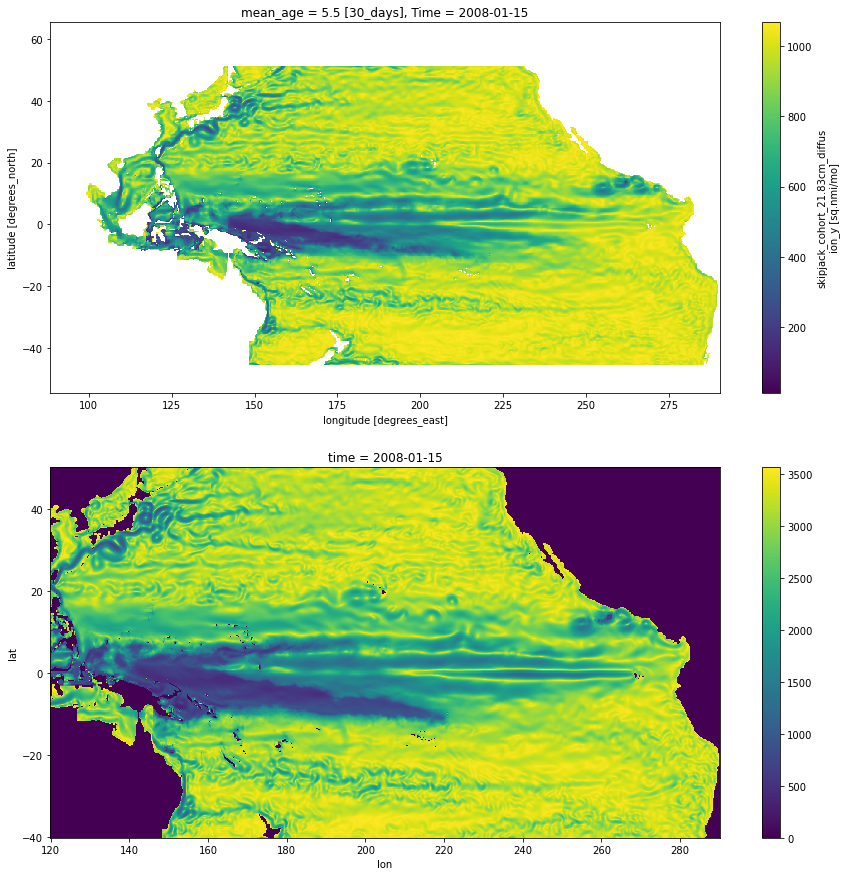

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))
S_Ky= xr.load_dataarray('./../data/Inna/FreeGlorys-025x30/skj_cohort_diffusion_y_20080115-20100715.nc')
# S_Ky.data = convertToMeters(S_Ky.data, square=True, timestep=30*86400)
S_Ky.isel(mean_age=age_to_plot).plot(ax=ax1)
fieldToDataArray(my_sim.ocean.Ky).isel(time=age_to_plot).plot(ax=ax2)

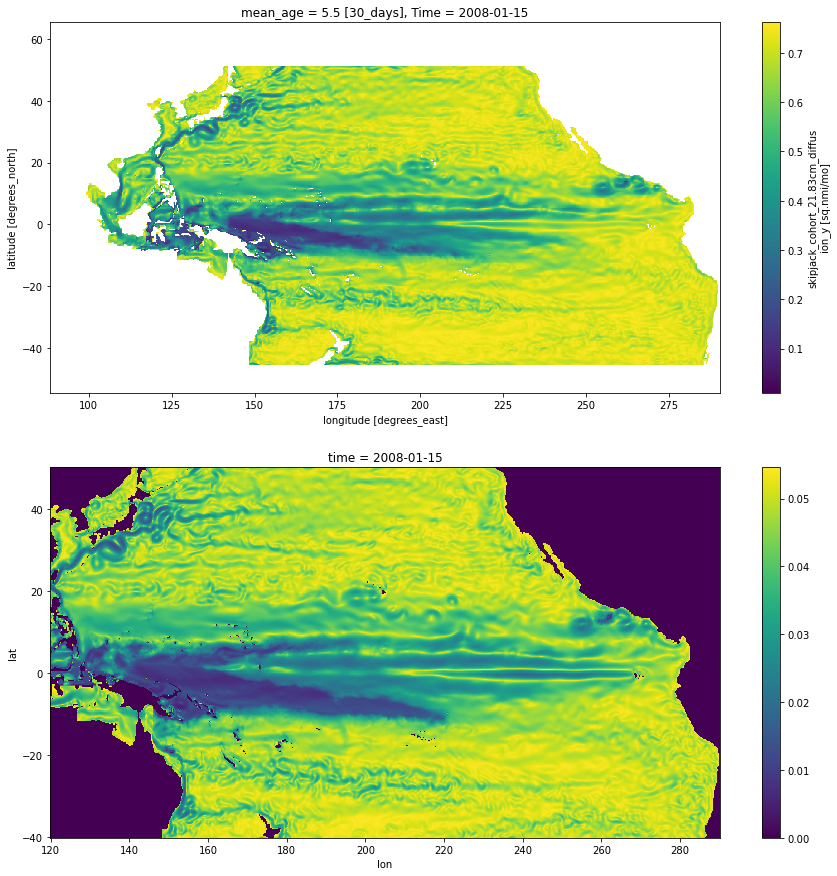

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))
S_Ky= xr.load_dataarray('./../data/Inna/FreeGlorys-025x30/skj_cohort_diffusion_y_20080115-20100715.nc')
S_Ky.data = convertToMeters(S_Ky.data, square=False, timestep=30*86400)
S_Ky.isel(mean_age=age_to_plot).plot(ax=ax1)
fieldToDataArray(my_sim.ocean.Ky).isel(time=age_to_plot).plot(ax=ax2)

In [ ]:
t=0
print(np.nanmin(S_Ky.isel(mean_age=t).data))
print(np.nanmax(S_Ky.isel(mean_age=t).data))

print(np.nanmin(my_sim.ocean.Ky.data[t,:,:]))
print(np.nanmax(my_sim.ocean.Ky.data[t,:,:]))

17.957922995437812
1411.0626074294103
0.0
7148.5015


In [ ]:
0.01* np.nanmax(my_sim.ocean.Ky.data[t,:,:]) - np.nanmax(S_Ky.isel(mean_age=t).data)
#Coincidence that the values are so close when reduce by order 2??

-1339.5775927809727

In [ ]:
for t in range(len(my_sim.ocean.Ky.grid.time)):
    print(0.01* np.nanmax(my_sim.ocean.Ky.data[t,:,:]) - np.nanmax(S_Ky.isel(mean_age=t).data))
#Maybe just a coincidence, yes... error increasing with age

5737.4388574143395
7344.474208899981
8835.937316749856
10225.869037428867


In [14]:
for t in range(len(my_sim.ocean.Ky.grid.time)):
    print(np.nanmedian(my_sim.ocean.Ky.data[t,:,:]) - np.nanmedian(S_Ky.isel(mean_age=t).data))
#same for median

140095.62
199972.06
263229.25
328509.06


---